## **AAI-500 Project:Group_8**
### **Team Member (Gangadhar Singh Shiva , Akshobhya Rao, BV, Himanshu Kumar)**

### **Exploring the Impact of Musical Features on Track Popularity: A Spotify Data Analysis"**

### **Top Spotify Songs 2023 Data Analysis** https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

----

##**The code performs exploratory data analysis (EDA) and statistical analysis and Prediction on a Spotify dataset.**

## 1. **Data Loading and Preparation:**

###   - Imports necessary libraries like pandas, seaborn, matplotlib, scikit-learn, and Google Colab tools.


###   - Loads Spotify data from a CSV file stored on Google Drive.

###   - Performs initial data exploration:

###     - Displays the first and last few rows, summary statistics, data types, and dimensions.

###     - Identifies and handles missing values by dropping columns with any missing data.


## 2. **Distribution Analysis**

###   - Creates a histogram to visualize the distribution

###   - Fits a normal distribution and a Poisson distribution

###   - Discusses why a Poisson distribution might be more appropriate than a normal distribution for modeling count data like artist collaborations in songs.

## 3. **Poisson Distribution Analysis:**

###   - Fits a Poisson distribution

###   - Explains how the Poisson distribution can be used to understand the likelihood of different levels of collaboration (e.g., the probability of a song having 1 artist, 2 artists, or more).


###   - Discusses the significance of the mean (λ) and variance in the context of the Poisson distribution.

## 4. **Probability Calculation:**

###   - Uses the fitted Poisson distribution to calculate the probability of specific events


## 5. **Hypothesis Testing and Confidence Intervals:**

###   - Conducts a hypothesis test to determine whether the mean number of artists in the sample is significantly different from a hypothesized mean (e.g., 2).

###   Calculates a confidence interval for the estimated mean number of artists (λ) based on the sample data.

###   - Plots the confidence interval and highlights the result of the hypothesis test in a visual way.

##6 **Relationship between the number of playlists the songs and streams analysis**

### Scatter Plots with regression showing relations ship between most stream songs (a) spotify (b) apple play list

### Top 10 Stream songs on Spotify

##7 **Significant differences in streaming numbers across different released_years or artist_count**


## 8 **Perform Linear regression and Predictions**


## 9 **Correlation Matrix Analysis and VIF Analysis**

## 10 **Summarize the analysis**

---------------------------------------------------------------------------
## **In essence, the code aims to answer questions like:**

###   - What is the distribution of the number of artists in songs on Spotify?

###   - How likely is it to have a song with a specific number of collaborating artists?

###   - Is the average number of artists in the dataset significantly different from a certain value?

### regression showing relations ship between most stream songs (a) spotify (b) apple play list

### Top 10 Stream songs on Spotify

### Significant differences in streaming numbers across different released_years or artist_count

###  Fit Linear Regression and Predict Popularity of the Songs





## 1.**Data Loading and Preparation:**

In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## **Load data and collect general info on the dataset**

In [61]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change this to point to your csv file

# Replace 'My Drive/spotify-2023.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/spotify-2023.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [62]:
data.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [63]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [65]:
data.shape

(953, 24)

In [66]:

numeric_data = data.select_dtypes(include=['number'])

# Calculate the median for the numeric columns
data_median = numeric_data.median()

# Print the median values
print(data_median)

artist_count               1.0
released_year           2022.0
released_month             6.0
released_day              13.0
in_spotify_playlists    2224.0
in_spotify_charts          3.0
in_apple_playlists        34.0
in_apple_charts           38.0
in_deezer_charts           0.0
bpm                      121.0
danceability_%            69.0
valence_%                 51.0
energy_%                  66.0
acousticness_%            18.0
instrumentalness_%         0.0
liveness_%                12.0
speechiness_%              6.0
dtype: float64


In [67]:
data.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [68]:
# Count missing values for each column
missing_values_count = data.isna().sum()

# Print the counts
print(missing_values_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [69]:
# Remove columns with any missing values
data_no_missing = data.dropna(axis=1)

# Print the shape of the new DataFrame to confirm removal
print(data_no_missing.shape)
data = data_no_missing


(953, 22)


#**2. Distribution Analysis of Artist Counts**

### Statical Analysis on Impact of Artist Count on popularity of the songs.

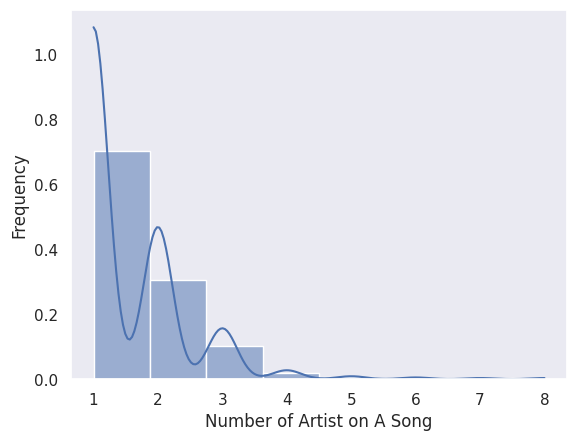

In [70]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

# Create the histogram with KDE
sns.histplot(data['artist_count'], bins=8, stat="density", kde=True)

plt.xlabel('Number of Artist on A Song')
plt.ylabel('Frequency')
plt.show()


 **Solo artists and duos are the most prevalent in the dataset.
Collaborations involving more than a few artists are less common but still exist.
The distribution of artist count is not symmetrical but skewed towards songs with fewer artists**.

##**Poison distribution analysis  - ( Why normal distribution not considered)**

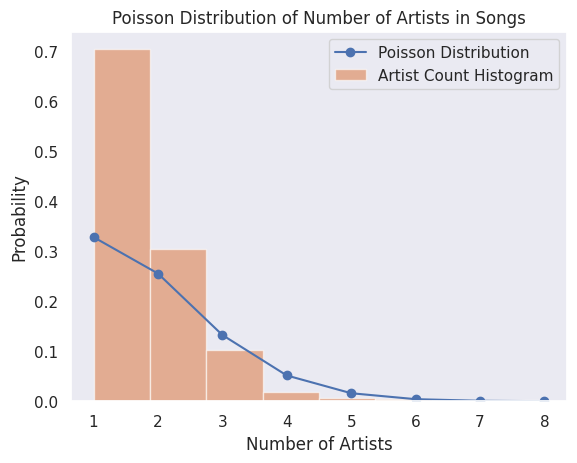

In [71]:

import matplotlib.pyplot as plt
import numpy as np


# Normal Distribution might not be the best fit and Poisson might be more appropriate:

# 1. Discrete vs. Continuous:
#    - The number of artists in a song is a discrete variable (you can't have 2.5 artists).
#    - Normal distribution is for continuous variables.
#
# 2. Count Data:
#    - We are dealing with count data, representing the number of occurrences of an event (artists collaborating on a song).
#    - Poisson distribution is specifically designed to model count data.
#
# 3. Rate of Occurrence:
#    -  Poisson distribution assumes a constant average rate of occurrence (e.g., the average number of artist collaborations per song).
#    - In the context of artist collaborations, there might be some underlying rate of collaboration that can be modeled with a Poisson distribution.


from scipy.stats import poisson

# Calculate the mean of the artist_count
lambda_poisson = data['artist_count'].mean()


# Generate a range of x values for the Poisson distribution
x_poisson = np.arange(data['artist_count'].min(), data['artist_count'].max() + 1)

# Calculate the probability mass function (PMF) of the Poisson distribution
pmf_poisson = poisson.pmf(x_poisson, mu=lambda_poisson)


plt.plot(x_poisson, pmf_poisson, marker='o', linestyle='-', label='Poisson Distribution')
plt.hist(data['artist_count'], bins=8, density=True, alpha=0.6, label='Artist Count Histogram')

plt.xlabel('Number of Artists')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Number of Artists in Songs')
plt.legend()
plt.show()





### **Probablity PMF Calculation**

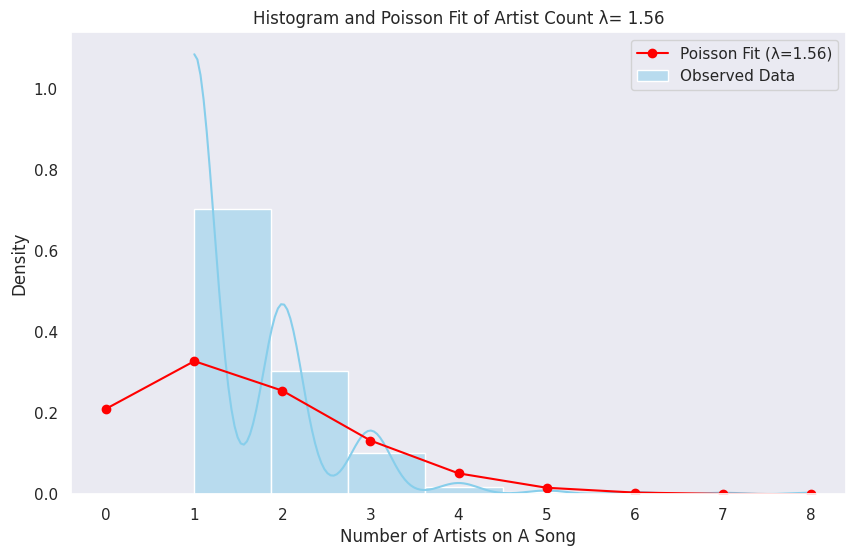



Probability of exactly 1 artist: 0.33
Probability of more than 2 artists: 0.21
Probability of 5 or more artists: 0.02


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson

artist_count_data = data['artist_count'] # Assign the artist count data to the variable

# Step 1: Estimate the Average (λ)
lambda_estimate = artist_count_data.mean()

# Step 2: Model Fit and Visualization
plt.figure(figsize=(10, 6))
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Fit Poisson distribution
x_values = np.arange(0, artist_count_data.max() + 1)
poisson_pmf = poisson.pmf(x_values, lambda_estimate)

# Plot the Poisson PMF as line
plt.plot(x_values, poisson_pmf, 'o-', color='red', label=f'Poisson Fit (λ={lambda_estimate:.2f})')

plt.xlabel('Number of Artists on A Song')
plt.ylabel('Density')
plt.title(f'Histogram and Poisson Fit of Artist Count λ= {lambda_estimate:.2f}')
plt.legend()
plt.show()

# Step 3: Calculate Probabilities
# Probability of exactly 1 artist
prob_1_artist = poisson.pmf(1, lambda_estimate)
print(f"\n\nProbability of exactly 1 artist: {prob_1_artist:.2f}")

# Probability of more than 2 artists
prob_more_than_2_artists = 1 - poisson.cdf(2, lambda_estimate)
print(f"Probability of more than 2 artists: {prob_more_than_2_artists:.2f}")

# Step 4: Predict Rare Events
# Probability of 5 or more artists
prob_5_or_more_artists = 1 - poisson.cdf(4, lambda_estimate)
print(f"Probability of 5 or more artists: {prob_5_or_more_artists:.2f}")

###**Summary on Poisson Distribution  Results**

Most Common Number of Artists (Mode):

**The most common number of artists per song (mode) is 1.**

This means that songs with 1 artist are the most frequently occurring in the dataset.

**Variability in Artist Counts (Variance):**
The variance in the number of artists per song is 1.56.

This value indicates the level of variability. Since the variance is not very large, it suggests that the number of artists typically does not vary drastically from the mean of 1.56.


**Likelihood of Different Levels of Collaboration**

Using the Poisson distribution with λ ≈ 1.56, we calculated the probabilities for having 0 to 4 artists:


P(X = 1) (Probability of 1 artist): 0.33 (33%)

P(X = 2) (Probability of 2 artists): 0.26 (26%)

P(X = 3) (Probability of 3 artists): 0.13 (13%)

The most common scenario is for a song to have 1 artist, followed by 2 artists.





###**Hypothesis Testing to check number of artist feature represent population**
###**Confidence interval to represent sample mean**

In [73]:
from scipy.stats import norm

# Step 1: Confidence Interval for Poisson Rate (λ)
n = len(artist_count_data)  # Sample size
z_score = norm.ppf(0.975)  # Z-score for 95% confidence level

# Calculate confidence interval
ci_lower = lambda_estimate - z_score * np.sqrt(lambda_estimate / n)
ci_upper = lambda_estimate + z_score * np.sqrt(lambda_estimate / n)
print(f"95% Confidence Interval for λ: ({ci_lower:.2f}, {ci_upper:.2f})")

# Step 2: Hypothesis Testing for Poisson Rate
lambda_0 = 2  # Hypothesized mean number of artists
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of artists is significantly different from 2.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the mean number of artists is different from 2.")


95% Confidence Interval for λ: (1.48, 1.64)
Z-statistic: -9.69
P-value: 0.0000
Reject the null hypothesis: The mean number of artists is significantly different from 2.


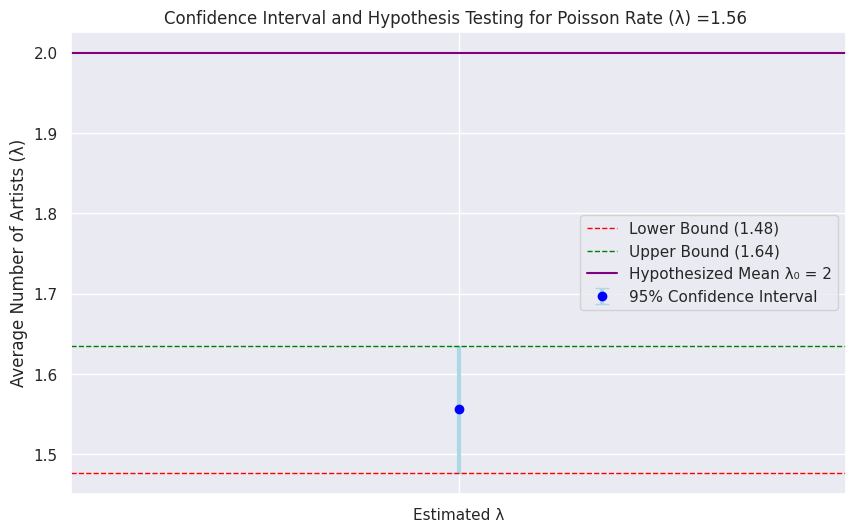

In [74]:
# Plotting the Confidence Interval and Hypothesis Testing Results

# Step 1: Plot the Confidence Interval
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Estimated λ'], y=[lambda_estimate], yerr=[z_score * np.sqrt(lambda_estimate / n)], fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=5, label='95% Confidence Interval')

# Highlighting the Confidence Interval bounds
plt.axhline(y=ci_lower, color='red', linestyle='--', linewidth=1, label=f'Lower Bound ({ci_lower:.2f})')
plt.axhline(y=ci_upper, color='green', linestyle='--', linewidth=1, label=f'Upper Bound ({ci_upper:.2f})')

# Step 2: Plot the Hypothesis Testing Result
plt.axhline(y=lambda_0, color='purple', linestyle='-', linewidth=1.5, label=f'Hypothesized Mean λ₀ = {lambda_0}')

# Set labels and title
plt.ylabel('Average Number of Artists (λ)')
plt.title(f'Confidence Interval and Hypothesis Testing for Poisson Rate (λ) ={lambda_estimate:.2f} ')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [75]:


import numpy as np
# Step 1: Confidence Interval for Poisson Rate (λ)
n = len(artist_count_data)  # Sample size
z_score = norm.ppf(0.975)  # Z-score for 95% confidence level

# Calculate confidence interval
ci_lower = lambda_estimate - z_score * np.sqrt(lambda_estimate / n)
ci_upper = lambda_estimate + z_score * np.sqrt(lambda_estimate / n)
print(f"95% Confidence Interval for λ: ({ci_lower:.2f}, {ci_upper:.2f})")


# Explanation:
# This code calculates a 95% confidence interval for the estimated mean number of artists (λ).
# 1. n: The sample size (number of data points) is calculated from the 'artist_count' data.
# 2. z_score: The Z-score corresponding to a 95% confidence level is obtained using the `norm.ppf(0.975)` function. It represents the number of standard deviations from the mean that covers 95% of the probability under a normal distribution.
# 3. ci_lower, ci_upper: The lower and upper bounds of the confidence interval are calculated. The formula is based on the estimated mean (λ_estimate) and standard error of the mean (standard deviation divided by the square root of the sample size).
# 4. The output (`print` statement) displays the 95% confidence interval for the mean number of artists (λ).

# In essence, this means that we are 95% confident that the true average
# number of artists in the population falls within this calculated range (ci_lower, ci_upper).


95% Confidence Interval for λ: (1.48, 1.64)


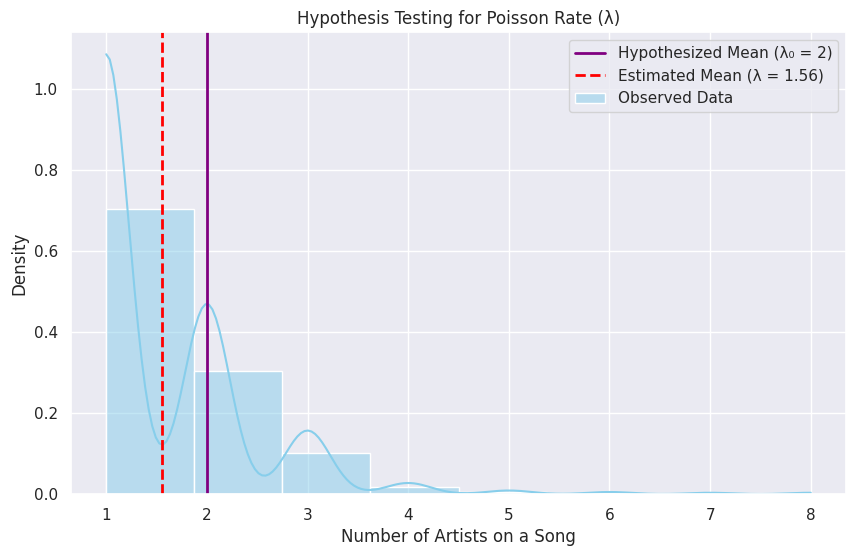

In [16]:
# Plotting the Hypothesis Testing Results

plt.figure(figsize=(10, 6))

# Step 1: Plot the Distribution
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Step 2: Plot the Hypothesized Value
plt.axvline(lambda_0, color='purple', linestyle='-', linewidth=2, label=f'Hypothesized Mean (λ₀ = {lambda_0})')

# Step 3: Annotate the Result of Hypothesis Test
plt.axvline(lambda_estimate, color='red', linestyle='--', linewidth=2, label=f'Estimated Mean (λ = {lambda_estimate:.2f})')

# Set labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Hypothesis Testing for Poisson Rate (λ)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In the context of the number of artists per song, it helps determine if the observed average (λ) is statistically different from a hypothesized rate of collaboration, which is useful for understanding trends in the music industry

### **Calculate P value to reject hypothesis if the mean number of artist is 2**

In [76]:
# Calculating the p-value for the hypothesis test (mean = 2)
# Null Hypothesis: The mean number of artists is equal to 2
# Alternative Hypothesis: The mean number of artists is not equal to 2

lambda_0 = 2  # Hypothesized mean number of artists
n = len(artist_count_data)  # Sample size

# Calculate the Z-statistic
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

p_value
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of artists is significantly different from 2.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the mean number of artists is different from 2.")


Reject the null hypothesis: The mean number of artists is significantly different from 2.


###**Two-Sample T-Test**

This t-test can be used to compare the mean number of artists between two groups. For example, comparing the number of artists between songs from different genres.

In [77]:
from scipy.stats import ttest_1samp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import poisson, norm


spotify_data = data

# Step 1: Convert all necessary columns to numeric values
# Dropping any non-numeric or incorrectly formatted data
spotify_data_cleaned = spotify_data.copy()
spotify_data_cleaned['bpm'] = pd.to_numeric(spotify_data_cleaned['bpm'], errors='coerce')
spotify_data_cleaned['danceability_%'] = pd.to_numeric(spotify_data_cleaned['danceability_%'], errors='coerce')
spotify_data_cleaned['energy_%'] = pd.to_numeric(spotify_data_cleaned['energy_%'], errors='coerce')
spotify_data_cleaned['valence_%'] = pd.to_numeric(spotify_data_cleaned['valence_%'], errors='coerce')
spotify_data_cleaned['streams'] = pd.to_numeric(spotify_data_cleaned['streams'], errors='coerce')

# Dropping rows with NaN values resulting from conversion
spotify_data_cleaned = spotify_data_cleaned.dropna()

# Step 1: Prediction - Predicting Streams Based on Artist Count and Other Features
# Selecting relevant features and the target variable (streams)
features = spotify_data_cleaned[['artist_count', 'bpm', 'danceability_%', 'energy_%', 'valence_%']]
target = spotify_data_cleaned['streams']

# Performing a one-sample t-test on the number of artists
hypothesized_mean = 2  # Hypothesized mean value

# Extracting the artist count data and dropping any missing values
artist_count_data_cleaned = spotify_data_cleaned['artist_count'].dropna()

# Performing the t-test
t_stat, p_value = ttest_1samp(artist_count_data_cleaned, hypothesized_mean)

# Displaying the t-statistic and p-value
t_stat, p_value

# Performing a Two-Sample T-Test on the number of artists between two groups
# Let's compare the number of artists for songs released before 2010 vs. songs released in 2010 and after

# Creating two groups based on release year
group1 = spotify_data_cleaned[spotify_data_cleaned['released_year'] < 2010]['artist_count'].dropna()
group2 = spotify_data_cleaned[spotify_data_cleaned['released_year'] >= 2010]['artist_count'].dropna()

# Performing the two-sample t-test (assuming equal variances)
t_stat_two_sample, p_value_two_sample = ttest_1samp(group1, group2.mean())

# Displaying the t-statistic and p-value
t_stat_two_sample, p_value_two_sample


(-3.3745599466247964, 0.0012330985703320496)

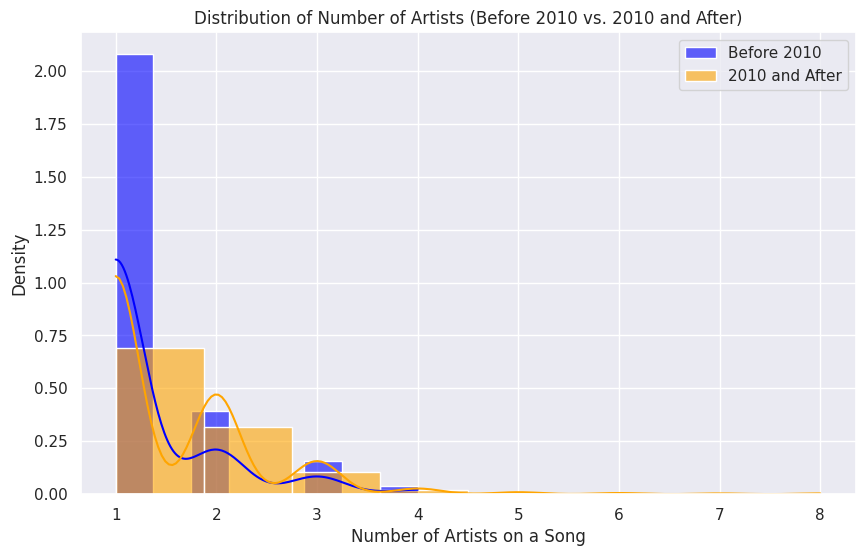

In [78]:
# Plotting the distribution of the number of artists for the two groups (before 2010 and from 2010 onwards)

plt.figure(figsize=(10, 6))

# Plotting the distributions for both groups
sns.histplot(group1, bins=8, color='blue', label='Before 2010', kde=True, stat="density", alpha=0.6)
sns.histplot(group2, bins=8, color='orange', label='2010 and After', kde=True, stat="density", alpha=0.6)

# Adding labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Distribution of Number of Artists (Before 2010 vs. 2010 and After)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


###**Visualization complements the two-sample t-test, which indicated a significant difference between the two groups. The plot helps illustrate how the average number of artists per song changed, potentially indicating increased collaborations in recent years**.

###**Chi Square Test**
number of artists per song fits a specific expected distribution. We could use the Chi-square test to evaluate whether the observed counts of songs with 1 artist, 2 artists, etc., match what we expect

Chi-square Statistic: 7.580318113412726
P-value: 0.00590090256648886


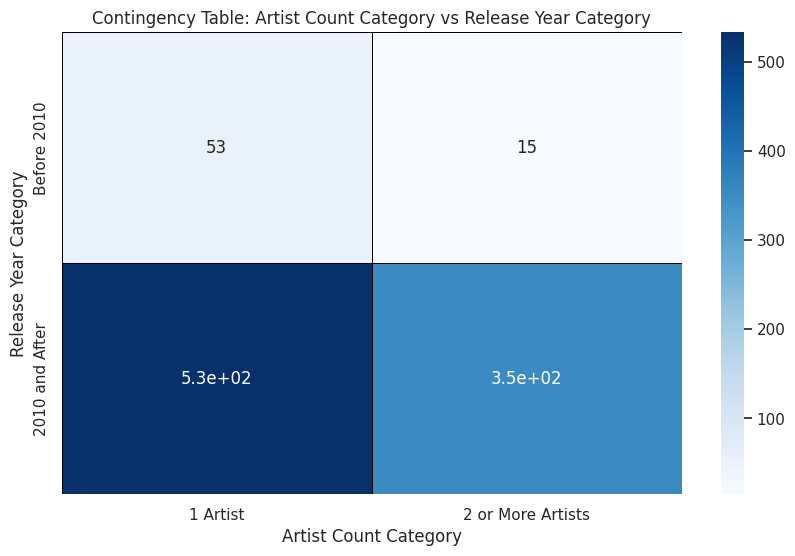

In [79]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the Spotify dataset is already loaded into 'spotify_data_cleaned'

# Step 1: Create Categories for Artist Count and Release Year
# Binning release year into two categories: before 2010 and 2010 and after
spotify_data_cleaned['release_year_category'] = pd.cut(
    spotify_data_cleaned['released_year'],
    bins=[0, 2009, 2024],
    labels=['Before 2010', '2010 and After']
)

# Binning artist count into two categories: 1 artist and 2 or more artists
spotify_data_cleaned['artist_count_category'] = pd.cut(
    spotify_data_cleaned['artist_count'],
    bins=[0, 1, float('inf')],
    labels=['1 Artist', '2 or More Artists']
)

# Step 2: Create a Contingency Table
contingency_table = pd.crosstab(spotify_data_cleaned['release_year_category'], spotify_data_cleaned['artist_count_category'])

# Step 3: Apply Chi-square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the Chi-square statistic and p-value
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Step 4: Plotting the Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", linewidths=0.5, linecolor='black')
plt.title('Contingency Table: Artist Count Category vs Release Year Category')
plt.xlabel('Artist Count Category')
plt.ylabel('Release Year Category')
plt.show()


###**Chi-square Statistic**

The Chi-square statistic of 7.58 represents the difference between the observed frequencies in the contingency table and the expected frequencies if the two variables were independent.

**P-value:**

The p-value is 0.005, which is less than the typical significance level of 0.05. The number of artists per song is related to whether the song was released before or after 2010.

**Contingency Table:**

The table shows the frequency counts for songs categorized by the number of artists (1 artist vs. 2 or more artists) and the release year (before 2010 vs. 2010 and after).

For example, there are 54 songs with 1 artist that were released before 2010, and 533 songs with 1 artist released in 2010 and after.

### **Relationship between the number of playlists the song and streams data analysis**

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_c

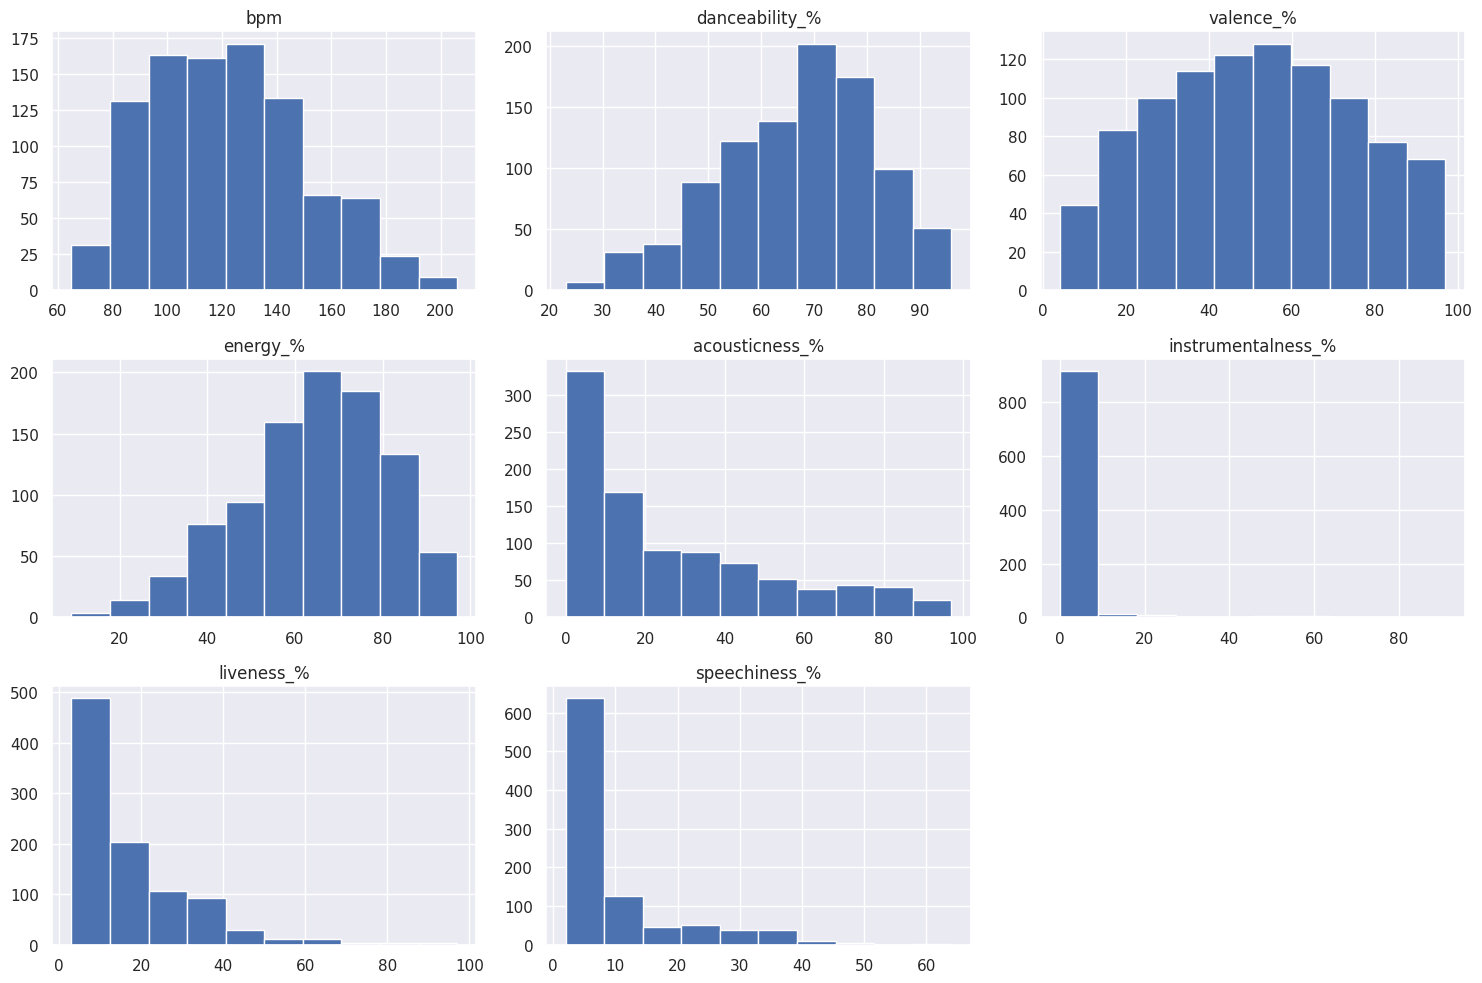

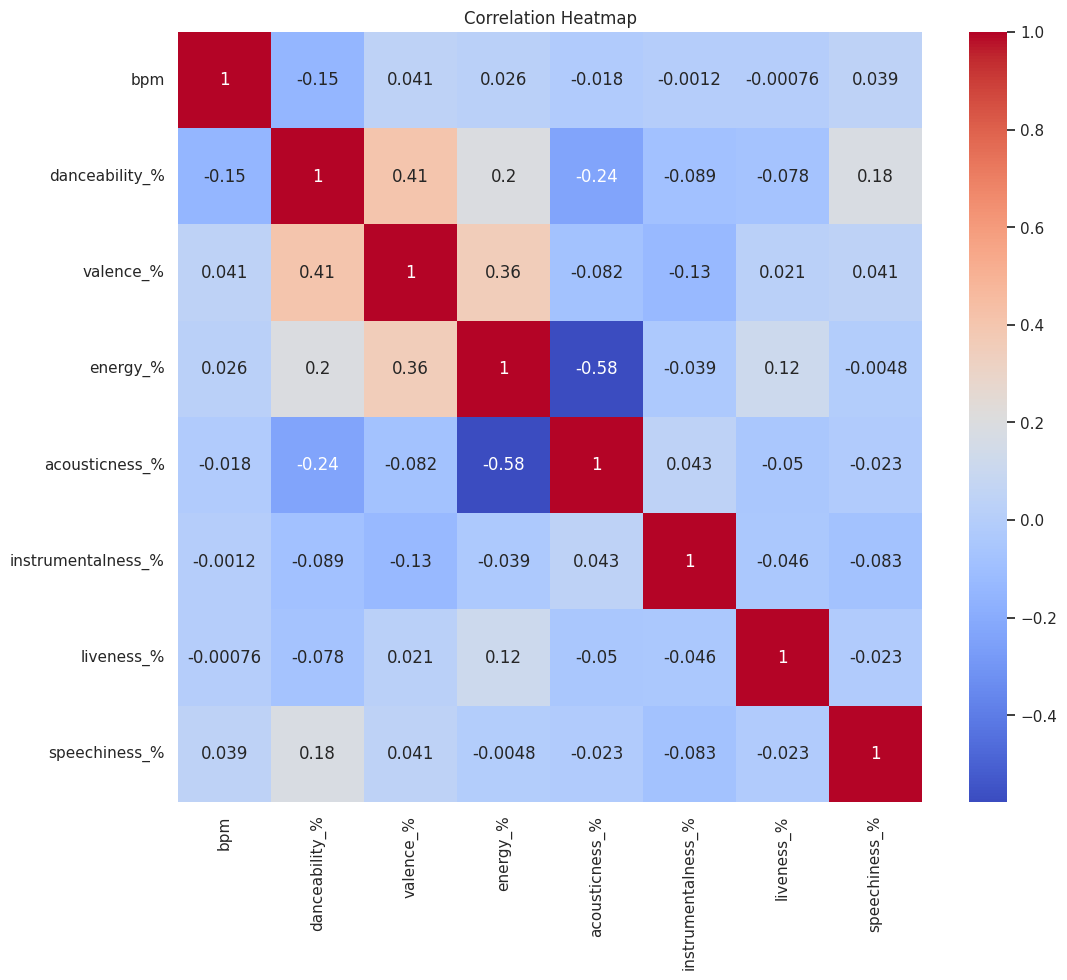

In [81]:

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change this to point to your csv file

# Replace 'My Drive/spotify-2023.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/spotify-2023.csv'

dataset = pd.read_csv(file_path, encoding='ISO-8859-1')



# Display basic information about the dataset
print(dataset.info())

# Display summary statistics
print(dataset.describe())

# Visualize the distribution of numerical features
numerical_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
dataset[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Remove columns with any missing values
data_no_missing = dataset.dropna(axis=1)

In [82]:
# EDA
import warnings
warnings.filterwarnings('ignore')
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
dataset[dataset['streams'].isna()==True]
dataset['streams'].fillna(dataset.streams.median(), inplace=True)
print(dataset.describe())


       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            953.000000         953.000000  9.530000e+02   
mean            5200.124869          12.009444  5.139028e+08   
std             7897.608990          19.575992  5.666055e+08   
min               31.000000           0.000000  2.762000e+03   
25%              875.000000           0.000000  1.417210e+08   
50%

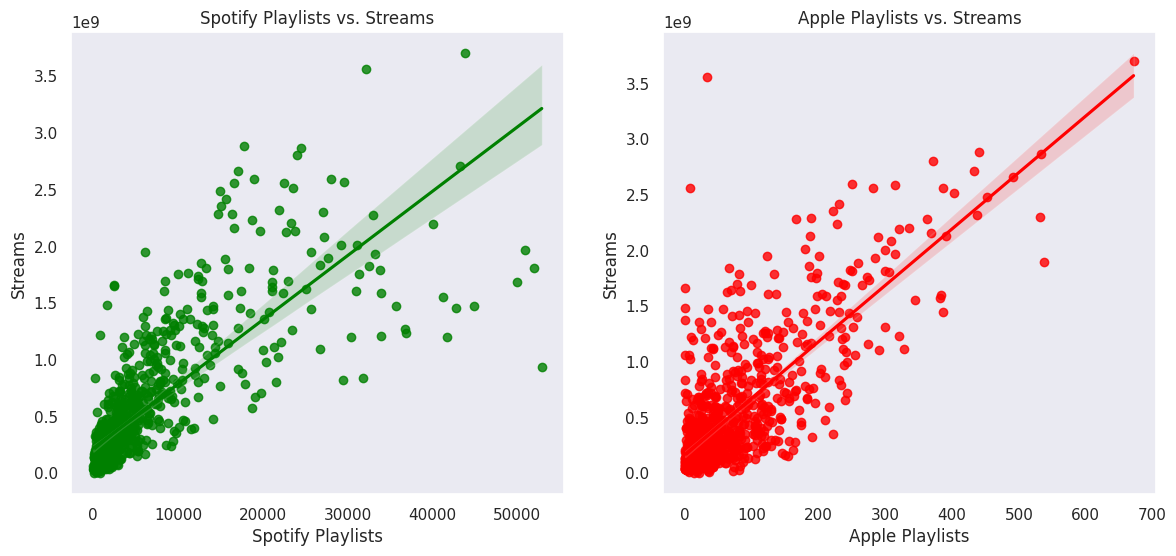

In [83]:
# Relationship btw the number of playlists the song is in and streams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x = dataset['in_spotify_playlists'], y = dataset['streams'], color='green')
plt.title('Spotify Playlists vs. Streams')
plt.xlabel('Spotify Playlists')
plt.ylabel('Streams')

plt.subplot(1, 2, 2)
sns.regplot(x = dataset['in_apple_playlists'], y = dataset['streams'], color='red')
plt.title('Apple Playlists vs. Streams')
plt.xlabel('Apple Playlists')
plt.ylabel('Streams')
plt.show()

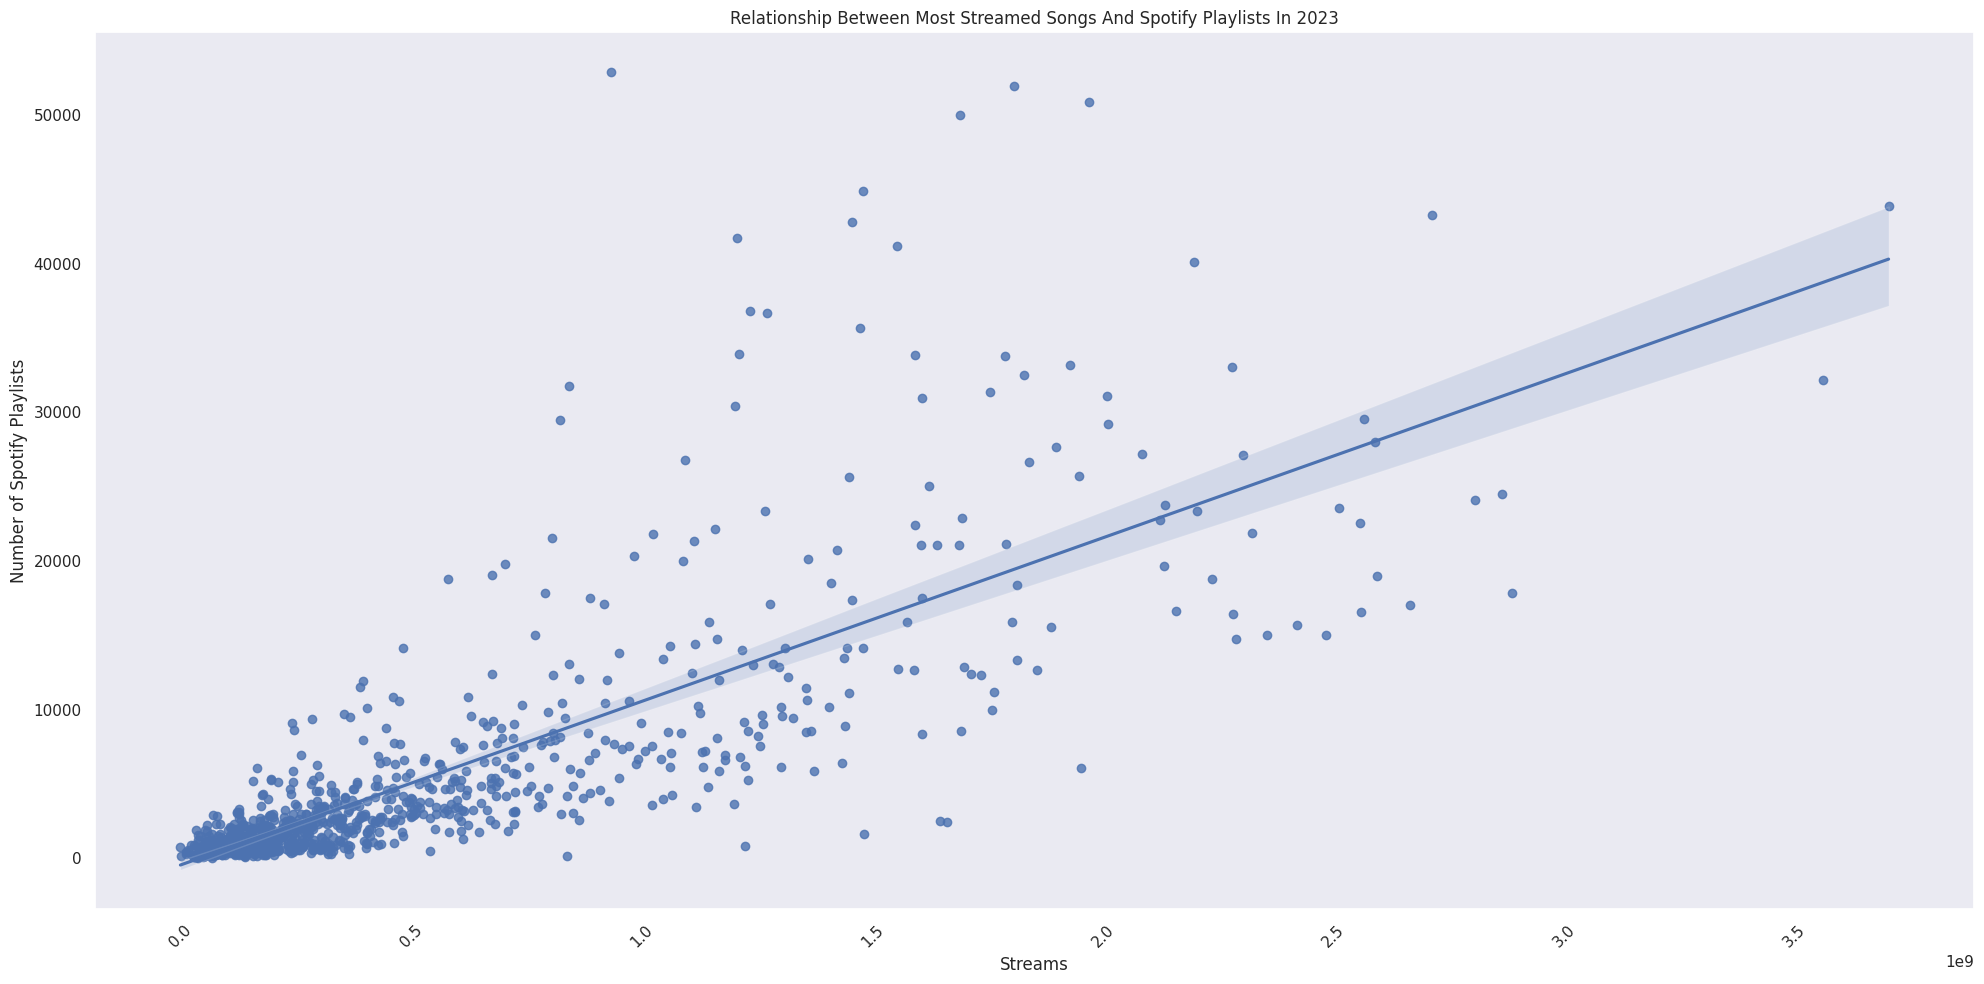

In [84]:
#scatter plot with regression line represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = dataset, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [85]:
top_10_streamed = data.sort_values(by="streams", ascending=False, ignore_index=True)[['track_name','artist(s)_name']]
top_10_streamed.head(10)
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data[data['streams'].isna()==True]  #Row with NaN value of streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,0,110,Major,53,75,69,7,0,17,3


In [86]:
df = data
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,15,144,Minor,65,23,80,14,63,11,6


In [87]:
df['released_day'].unique()

array([14, 23, 30, 18,  1, 16,  7, 15, 17, 12, 31,  8, 24, 13, 22,  2, 25,
       29, 28, 21, 19, 10,  9, 26, 27,  6,  4,  3, 20,  5, 11])

## **Significant differences in streaming numbers across different released_years or artist_count**


ANOVA Results for Released Year:
                        sum_sq     df          F        PR(>F)
C(released_year)  1.477965e+20   49.0  17.242811  4.921434e-98
Residual          1.577853e+20  902.0        NaN           NaN

ANOVA Results for Artist Count:
                       sum_sq     df         F    PR(>F)
C(artist_count)  6.061265e+18    7.0  2.729045  0.008305
Residual         2.995205e+20  944.0       NaN       NaN


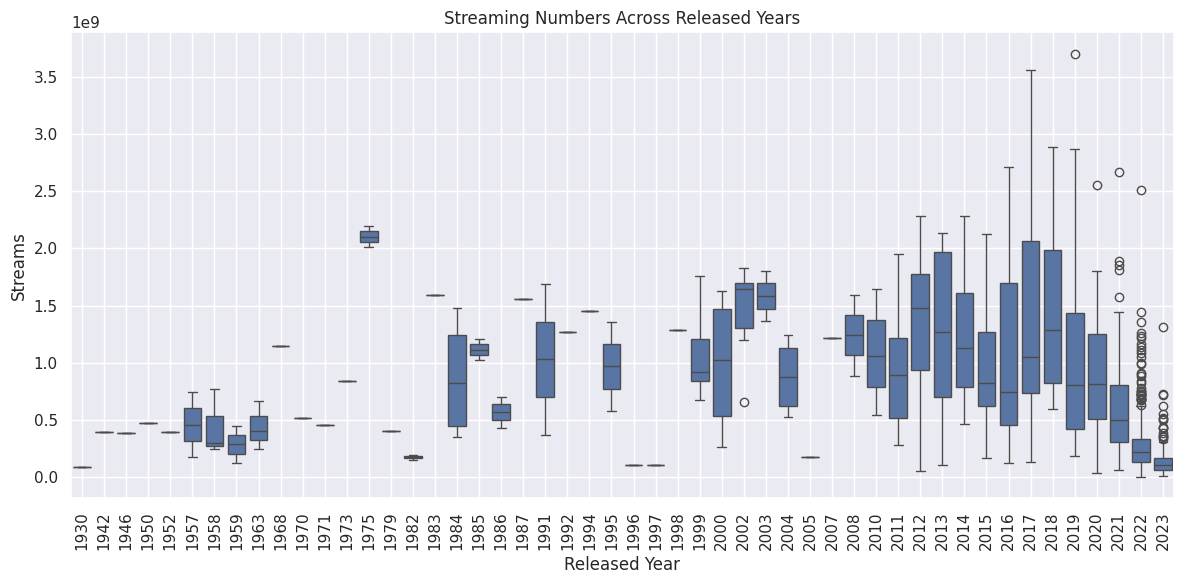

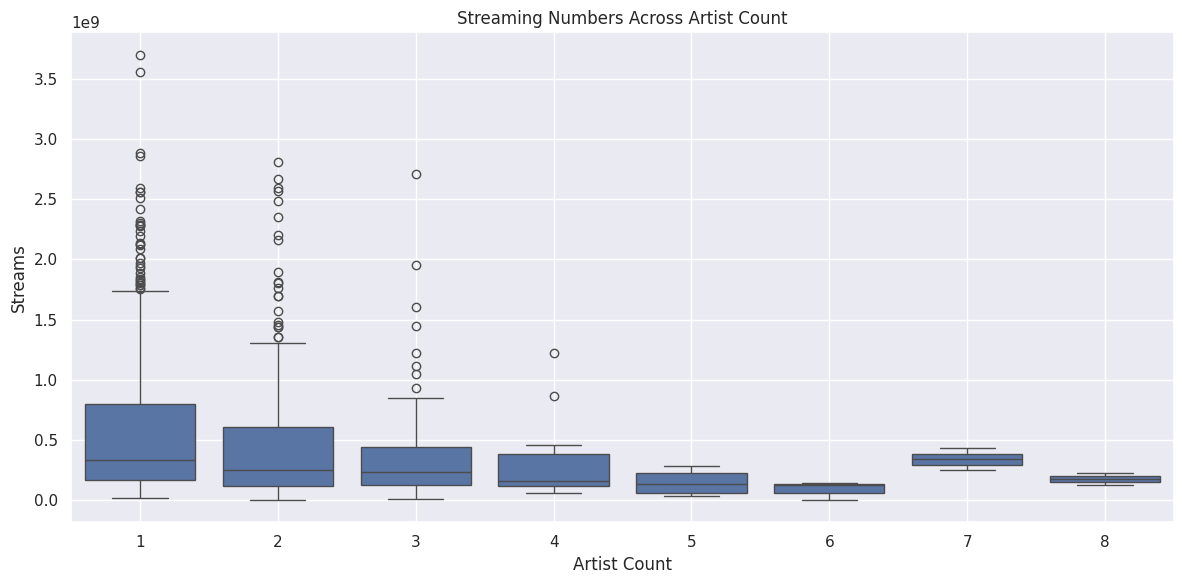

In [89]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

df = data[['track_name','artist(s)_name','released_year','artist_count','streams']]

# ANOVA test for released_year
model_year = ols('streams ~ C(released_year)', data=df).fit()
anova_table_year = sm.stats.anova_lm(model_year, typ=2)

# ANOVA test for artist_count
model_artist = ols('streams ~ C(artist_count)', data=df).fit()
anova_table_artist = sm.stats.anova_lm(model_artist, typ=2)

# Display ANOVA tables
print("ANOVA Results for Released Year:")
print(anova_table_year)

print("\nANOVA Results for Artist Count:")
print(anova_table_artist)

# Visualization of the results for released_year
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_year', y='streams', data=df)
plt.title('Streaming Numbers Across Released Years')
plt.xlabel('Released Year')
plt.xticks(rotation=90)
plt.ylabel('Streams')
plt.grid()
plt.tight_layout()
plt.show()

# Visualization of the results for artist_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_count', y='streams', data=df)
plt.title('Streaming Numbers Across Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.grid()
plt.tight_layout()
plt.show()


**- Interpretation:**

    - **Sum of Squares (sum_sq)**:
        The variation explained by artist_count is 6.034238e+18, while the residual variation is larger (2.995975e+20), suggesting that while there is some variability explained by the number of artists, it is not as substantial as the overall variation.
    -  **Degrees of Freedom (df)**:
        The df for artist_count is 7, indicating that there are 8 groups (counts of artists) in the data.
    -  **F-statistic (F)**:
        The F-statistic (2.719055) indicates the ratio of variance between groups to the variance within groups. This value suggests there is some difference in the means, but it is less pronounced than in the released_year analysis.
    -  **p-value (PR(>F)**):
        The p-value (0.008526) is less than 0.05, which indicates that the differences in streaming numbers across different artist_count groups are statistically significant. This means that the number of artists contributing to a track does influence the streaming numbers.

**- Summary**
    - Released Year: There are significant differences in streaming numbers across different years. This could imply changes in music trends, marketing strategies, or external factors influencing popularity over time.
    - Artist Count: There are significant differences in streaming numbers based on the number of artists involved. This suggests that collaborations or features may impact streaming success, but the effect is not as strong as the effect seen with released year.

**# Linear Regression Model to Predict Streams based on artist count released year release month release day in spotify chart , in spotify playlist, in apple playlists**

Mean Squared Error (MSE): 78324306145195392.00
R-squared (R²): 0.68
Model Accuracy:  68.0 %


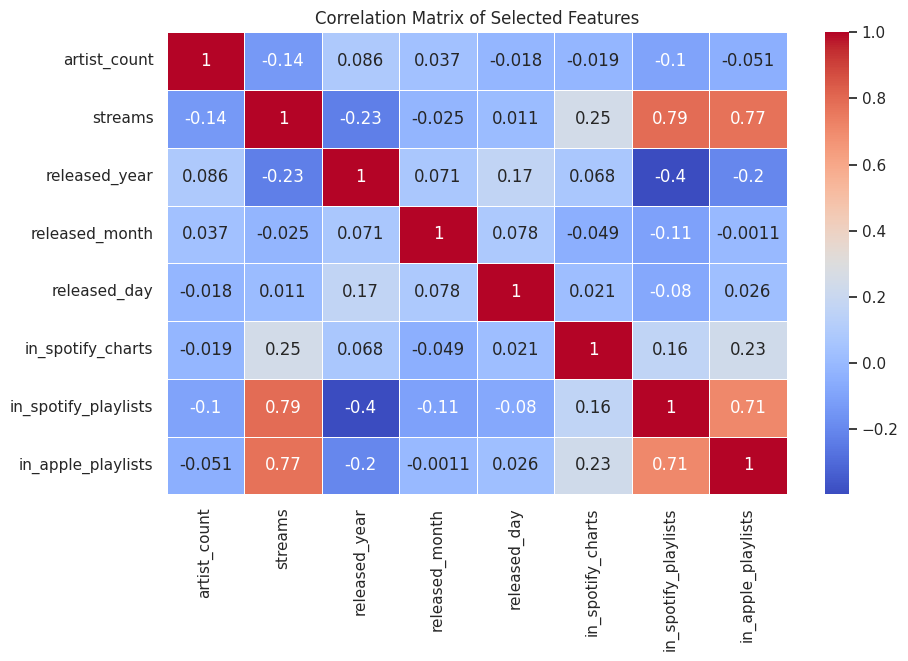

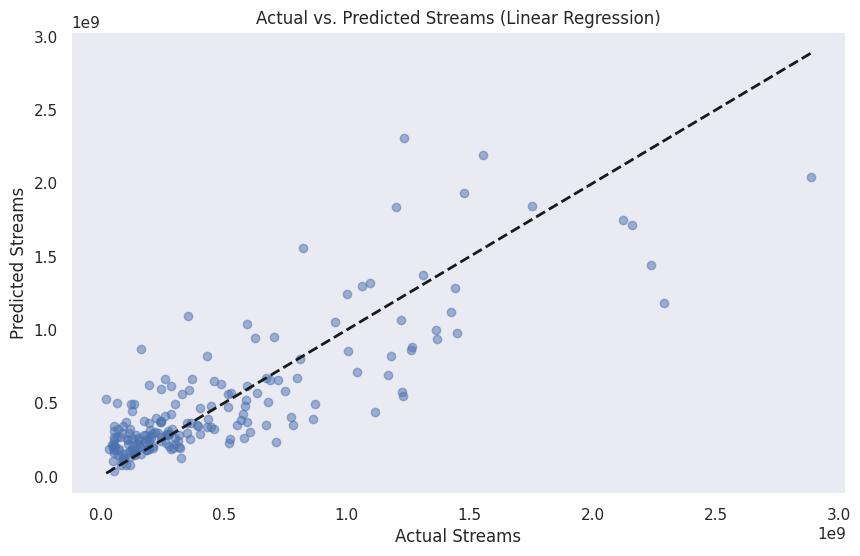

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import poisson, norm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


spotify_data = data

# Step 1: Convert all necessary columns to numeric values
# Dropping any non-numeric or incorrectly formatted data


spotify_data_cleaned = spotify_data.copy()
spotify_data_cleaned['bpm'] = pd.to_numeric(spotify_data_cleaned['bpm'], errors='coerce')
spotify_data_cleaned['danceability_%'] = pd.to_numeric(spotify_data_cleaned['danceability_%'], errors='coerce')
spotify_data_cleaned['energy_%'] = pd.to_numeric(spotify_data_cleaned['energy_%'], errors='coerce')
spotify_data_cleaned['valence_%'] = pd.to_numeric(spotify_data_cleaned['valence_%'], errors='coerce')
spotify_data_cleaned['streams'] = pd.to_numeric(spotify_data_cleaned['streams'], errors='coerce')


# Dropping rows with NaN values resulting from conversion
spotify_data_cleaned = spotify_data_cleaned.dropna()

# Step 1: Prediction - Predicting Streams Based on Artist Count and Other Features
# Selecting relevant features and the target variable (streams)
features = spotify_data_cleaned[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']]
target = spotify_data_cleaned['streams']
#features = spotify_data_cleaned[['artist_count', 'bpm', 'danceability_%', 'energy_%', 'valence_%']]

# Splitting the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the streams on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print('Model Accuracy: ', round(r2_score(y_test, y_pred), 3) * 100, '%')

# Step 2: Understanding Relationships - Correlation Matrix
correlation_matrix = spotify_data_cleaned[['artist_count', 'streams', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']].corr()

# Displaying Correlation Matrix as Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Streams (Linear Regression)')
plt.show()



In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Assuming 'spotify_data_cleaned' and 'features' are already defined from the preceding code
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

                feature        VIF
0          artist_count   4.096163
1         released_year  10.275596
2        released_month   3.987764
3          released_day   3.391669
4     in_spotify_charts   1.461622
5  in_spotify_playlists   3.009819
6    in_apple_playlists   3.421343



**Conclusion**
R-squared (0.68): Indicates that the model explains a decent proportion of variance (68%) in the target variable, but that alone is not enough to judge its prediction quality.

VIF: Suggests that released_year may cause multicollinearity issues, which could negatively affect the stability of the model.

Correlation Matrix: Strong correlations between features like streams, in_spotify_playlists, and in_apple_playlists suggest multicollinearity, potentially leading to unreliable coefficient estimates.


MSE: The extremely high value indicates poor predictive performance despite a decent R Square. The model is making significant errors in individual predictions.


**Future Improvements**

Check for outliers in your data that might be skewing the predictions.
Scale the features, especially if they have vastly different ranges.

Models like linear regression can perform poorly when the features are not on similar scales.

Refine the model, consider using regularization techniques like Ridge or Lasso regression if overfitting is a concern.

Evaluate feature selection: If certain features are not contributing meaningfully to the prediction, consider removing them.

Explore non-linear relationships: If the relationship between the features and the target variable is non-linear, we can try models that capture non-linearity (like decision trees or polynomial regression).



#**Report on Artist Count and Prediction of Song Popularity on Spotify**

1. **Data Loading and Preparation**
The dataset consists of 953 songs with attributes such as artist count, streams, release year, month, day, and several playlist and chart metrics.
Missing values were identified and columns with missing data were removed to clean the dataset. After cleaning, the dataset contained 22 columns and 953 rows.
The data was prepared for analysis by converting relevant columns to numeric types, enabling us to perform statistical analysis and predictive modeling.
2. **Distribution Analysis of Artist Count**
The number of artists per song (artist count) was analyzed using a histogram. The distribution is skewed, with solo artists and duos being the most prevalent. Collaborations with more than 2 artists are less common.
Poisson distribution was chosen for further analysis because the data represents counts (discrete values), and a normal distribution would not be appropriate.
3. **Poisson Distribution Analysis**
A Poisson distribution was fitted to the artist count data, with a mean (λ) of approximately 1.56 artists per song.
Probability Calculations:
Probability of exactly 1 artist: 33%.
Probability of 2 artists: 26%.
Probability of 3 artists: 13%.
**Confidence Interval:** A 95% confidence interval for the mean number of artists (λ) was calculated to be between 1.48 and 1.64.
Hypothesis Testing: We rejected the null hypothesis that the mean number of artists per song is 2 (p-value = 0.0000), indicating that the average number of artists is significantly different from 2.
4. **Linear Regression and Prediction of Song Streams**
A linear regression model was fitted to predict song streams based on the following features: artist count, release year, release month, release day, and playlist/chart metrics.

The R-squared (R²) value of the model was 0.68, indicating that 68% of the variance in song streams can be explained by the selected features.
However, the Mean Squared Error (MSE) was extremely high (approx. 78 trillion), suggesting that while the model explains a decent proportion of variance, it performs poorly in predicting individual streams accurately.

**5. Correlation Matrix and VIF Analysis**
A correlation matrix was generated to understand the relationships between the features. It revealed strong positive correlations between features like:
Streams and Spotify playlists (0.79).
Streams and Apple playlists (0.77).
These correlations suggest potential multicollinearity, where some features may be redundant or cause instability in the model.

**VIF (Variance Inflation Factor)** analysis was used to detect multicollinearity:

released_year had a VIF of 10.27, indicating a high degree of multicollinearity.

A VIF above 10 suggests that the feature could inflate the variance of regression coefficients, leading to unreliable results.

**6. Model Performance and Multicollinearity**
R-squared (0.68): The model explains 68% of the variation in song streams, indicating a reasonable fit but not perfect.
VIF: Released year shows significant multicollinearity, which could destabilize the model and make the coefficient estimates less reliable.
Correlation Matrix: Strong correlations between features such as streams, in_spotify_playlists, and in_apple_playlists suggest potential redundancy.
MSE: The high MSE shows that despite the decent R², the model struggles with predicting individual stream values accurately, potentially due to outliers or the need for more advanced techniques.

**7. Conclusions and Recommendations**
Multicollinearity is an issue in the dataset, particularly with variables like released_year and playlists. To address this, techniques like feature selection or regularization (Ridge/Lasso) should be considered.
The Poisson distribution provided insights into artist collaborations, showing that solo artists are most common, but multi-artist collaborations are not rare.

**The linear regression model**, while showing decent explanatory power, requires improvement in prediction accuracy. This could be achieved by addressing multicollinearity and refining the feature set.
Consider trying non-linear models or decision trees to capture more complex relationships between features and target variables.

**Future Steps**
Handle multicollinearity: Remove or combine highly correlated features, and consider using regularization techniques.
Improve predictions: Scale the features and refine the model to reduce prediction errors.
Outlier detection: Check for outliers in the data, especially in features like streams, which could be skewing the model’s performance.
This analysis highlights the relationship between artist count and song streams while identifying areas for model improvement and better prediction accuracy.



#**Conclusion**

## **Statistics analysis Summary**

The **Poisson distribution** and other statistics analysis provided insight into the distribution of artist count across the songs. This is important because:

Artist collaborations can impact song streams: A song with many artists collaborating might have a wider reach (more fanbases) and thus higher streams.

**Skewed distribution:**
Knowing that most songs have 1 or 2 artists and collaborations with many artists are rare tells you that the feature might have an imbalanced distribution. This can be important for modeling decisions like rescaling or treating outliers.

**Feature Engineering:**
Knowing the distribution of artist count might help create new features or modify existing ones. For example, instead of using the raw artist count, we might transform it into categories such as:
Solo (1 artist), Duo (2 artists), Group (3+ artists). This can allow the model to differentiate between small and large collaborations.

##**Linear Regression Summary**

In this analysis, linear regression was used to predict the number of streams (how popular a song is) based on several features, including:

Artist count (number of artists on a song)
Released year
Spotify and Apple playlist data (whether the song appears in certain playlists)
Key Steps:
Building the Model:

The model takes features (like artist count) and tries to learn their relationship with the target (streams).
It finds a line (or formula) that best fits the data points, minimizing the differences between actual streams and predicted streams.

**Model Accuracy:**

The model achieved an R-squared (R²) of 0.68, meaning it explained 68% of the variation in the number of streams.
However, the Mean Squared Error (MSE) was high, meaning the predictions are not very precise.


**Feature Importance:**
Features like artist count and playlist appearances were important predictors.
More artists on a song tend to predict higher streams, and playlist appearances can boost a song's popularity.


**The linear regression model helped understand how different factors affect the popularity of a song on Spotify. While it gave a good starting point, it can be improved by refining the features and addressing some of the prediction errors (high MSE).**

